In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.formula.api as smf
import math
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

# Problem 1 - Cubic Zirconia Data Analysis

In [2]:
ds=pd.read_csv('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/Session 5- Predictive Modeling and Analytics/Project/Datasets/cubic_zirconia.csv')
ds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


# Question 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
row, col = ds.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 26967 rows and 11 columns in the dataset


In [5]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [6]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


In [7]:
ds.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth          True
table         False
x             False
y             False
z             False
price         False
dtype: bool

In [8]:
ds.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [9]:
dups=ds.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [10]:
ds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [11]:
ds.drop(["Unnamed: 0"],axis=1,inplace=True)

In [12]:
ds.skew(axis=0,skipna=True)

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [13]:
ds.kurtosis(axis=0,skipna=True)

carat      1.215364
depth      3.674431
table      1.582166
x         -0.657825
y        159.291616
z         87.006350
price      2.148617
dtype: float64

In [14]:
for column in ds.columns:
    if ds[column].dtype !='object':
        median=ds[column].median()
        ds[column]=ds[column].fillna(median)
ds.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [15]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

def detect_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range,upper_range

In [16]:
lr,ur=remove_outlier(ds['carat'])
lr1,ur1=remove_outlier(ds['depth'])
lr2,ur2=remove_outlier(ds['table'])
lr3,ur3=remove_outlier(ds['x'])
lr4,ur4=remove_outlier(ds['y'])
lr5,ur5=remove_outlier(ds['z'])
lr6,ur6=remove_outlier(ds['price'])
print("lower range",lr,"upper range",ur)
print("lower range",lr1,"upper range",ur1)
print("lower range",lr2,"upper range",ur2)
print("lower range",lr3,"upper range",ur3)
print("lower range",lr4,"upper range",ur4)
print("lower range",lr5,"upper range",ur5)
print("lower range",lr6,"upper range",ur6)

lower range -0.5750000000000001 upper range 2.0250000000000004
lower range 59.0 upper range 64.6
lower range 51.5 upper range 63.5
lower range 1.9500000000000002 upper range 9.309999999999999
lower range 1.9649999999999999 upper range 9.285
lower range 1.1899999999999997 upper range 5.75
lower range -5677.5 upper range 11982.5


In [17]:
num = ds.select_dtypes(include=['int','float']).columns

In [18]:
def proportion(x):
        xs = pd.Series(sorted(ds[x]))
        Q3 = xs.quantile(q=0.75)
        Q1 = xs.quantile(q=0.25)
        IQR = Q3-Q1
        LR = Q1-(1.5*IQR)
        UR = Q3+(1.5*IQR)
        
        data = ds[x]
        count = 0
        for value in data:
            if (value<LR) or (value>UR):
                count += 1
            else:
                pass

        _proportion = round((count/len(ds[x]))*100,2)
        print('Outlier proportion: {}: {}%'.format(x, _proportion))

In [19]:
for i in num:
    proportion(i)

Outlier proportion: carat: 2.45%
Outlier proportion: depth: 5.26%
Outlier proportion: table: 1.18%
Outlier proportion: x: 0.06%
Outlier proportion: y: 0.06%
Outlier proportion: z: 0.09%
Outlier proportion: price: 6.6%


In [20]:
corr1=ds.corr()
round(corr1,2)

,carat,depth,table,x,y,z,price
carat,1.00,0.03,0.18,0.98,0.94,0.94,0.92
depth,0.03,1.00,-0.29,-0.02,-0.02,0.10,-0.00
table,0.18,-0.29,1.00,0.20,0.18,0.15,0.13
x,0.98,-0.02,0.20,1.00,0.96,0.96,0.89
y,0.94,-0.02,0.18,0.96,1.00,0.93,0.86
z,0.94,0.10,0.15,0.96,0.93,1.00,0.85
price,0.92,-0.00,0.13,0.89,0.86,0.85,1.00


<AxesSubplot:>

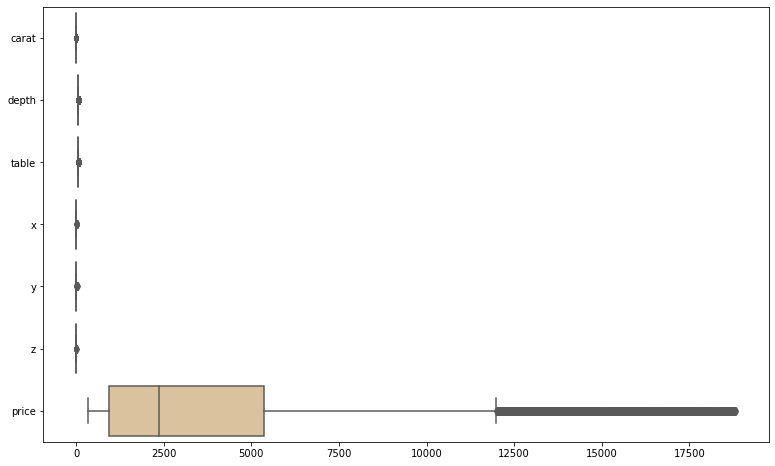

In [21]:
plt.figure(figsize=(13,8))
sns.boxplot(data=ds,orient="h", palette="Set2")

In [22]:
for column in ds.columns:
    if ds[column].dtype=='object':
        print(column.upper(),': ',ds[column].nunique())
        print(ds[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [23]:
ds[['carat','depth','table','x','y','z','price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

In [24]:
ds[['carat','depth','table']].describe()

,carat,depth,table
count,26967.000000,26967.000000,26967.000000
mean,0.798375,61.746564,57.456080
std,0.477745,1.394509,2.232068
min,0.200000,50.800000,49.000000
25%,0.400000,61.100000,56.000000
50%,0.700000,61.800000,57.000000
75%,1.050000,62.500000,59.000000
max,4.500000,73.600000,79.000000


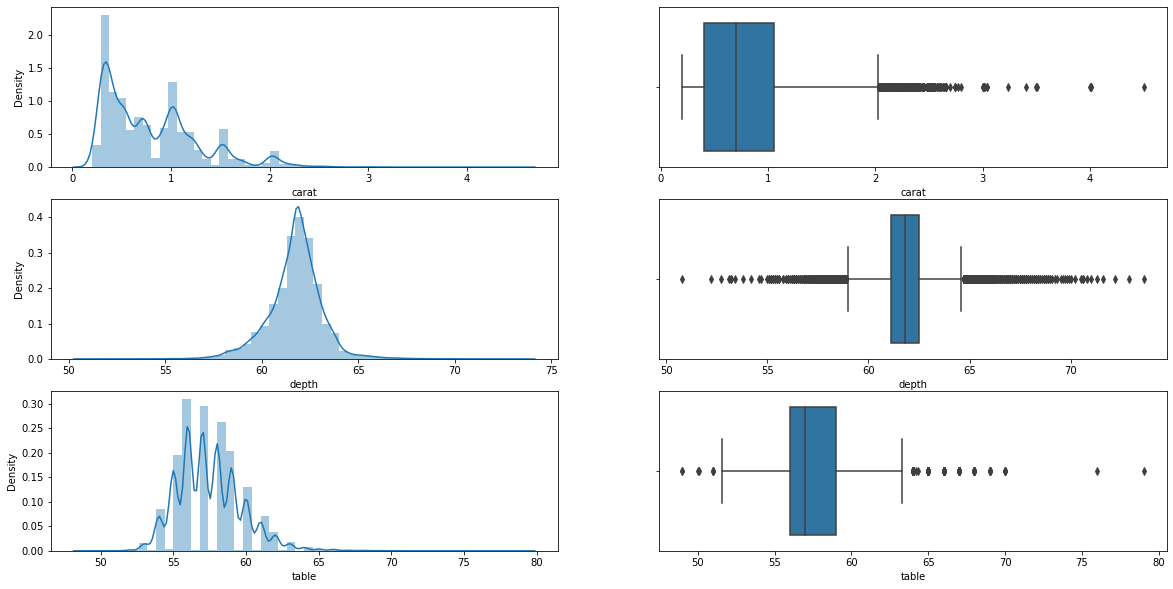

In [25]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['carat'],kde=True,ax=axes[0][0])
sns.boxplot(x='carat',data=ds,ax=axes[0][1])
sns.distplot(ds['depth'],kde=True,ax=axes[1][0])
sns.boxplot(x='depth',data=ds,ax=axes[1][1])
sns.distplot(ds['table'],kde=True,ax=axes[2][0])
sns.boxplot(x='table',data=ds,ax=axes[2][1])
plt.show()

In [26]:
ds[['price','x']].describe()

,price,x
count,26967.000000,26967.000000
mean,3939.518115,5.729854
std,4024.864666,1.128516
min,326.000000,0.000000
25%,945.000000,4.710000
50%,2375.000000,5.690000
75%,5360.000000,6.550000
max,18818.000000,10.230000


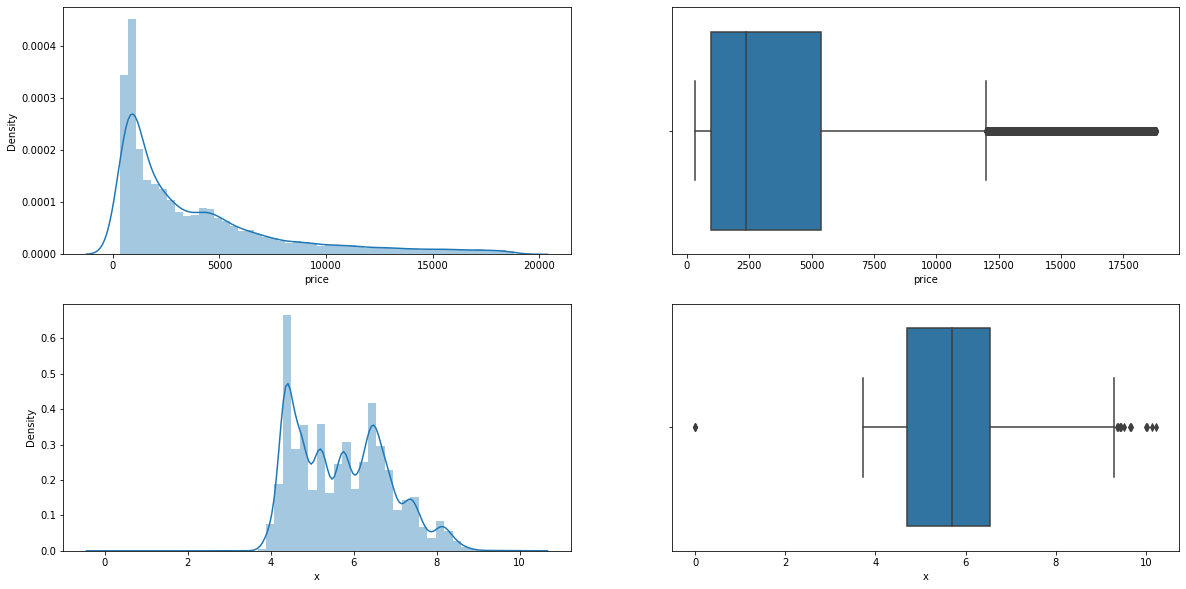

In [27]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['price'],kde=True,ax=axes[0][0])
sns.boxplot(x='price',data=ds,ax=axes[0][1])
sns.distplot(ds['x'],kde=True,ax=axes[1][0])
sns.boxplot(x='x',data=ds,ax=axes[1][1])
plt.show()

In [28]:
ds[['y','z']].describe()

,y,z
count,26967.000000,26967.000000
mean,5.733569,3.538057
std,1.166058,0.720624
min,0.000000,0.000000
25%,4.710000,2.900000
50%,5.710000,3.520000
75%,6.540000,4.040000
max,58.900000,31.800000


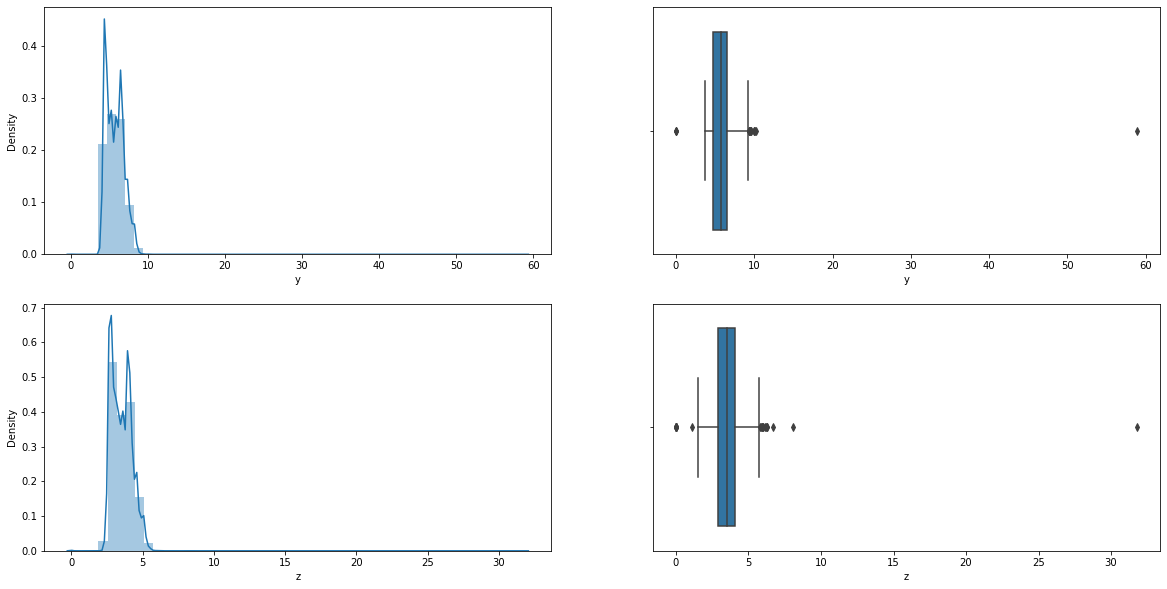

In [29]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['y'],kde=True,ax=axes[0][0])
sns.boxplot(x='y',data=ds,ax=axes[0][1])
sns.distplot(ds['z'],kde=True,ax=axes[1][0])
sns.boxplot(x='z',data=ds,ax=axes[1][1])
plt.show()

<AxesSubplot:xlabel='color', ylabel='price'>

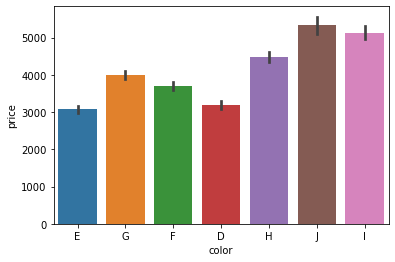

In [30]:
sns.barplot(x="color", y="price", data=ds)

<AxesSubplot:xlabel='cut', ylabel='price'>

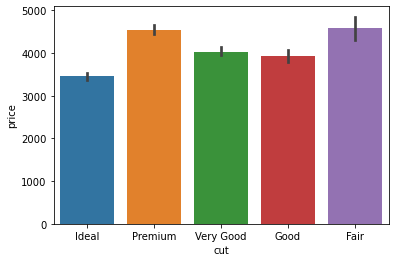

In [31]:
sns.barplot(x="cut", y="price", data=ds)

<AxesSubplot:xlabel='clarity', ylabel='price'>

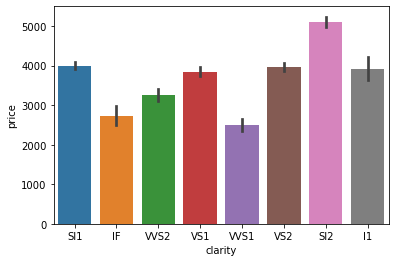

In [32]:
sns.barplot(x="clarity", y="price", data=ds)

<AxesSubplot:xlabel='carat', ylabel='price'>

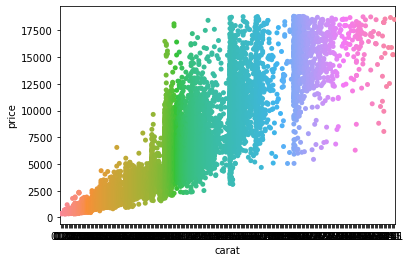

In [33]:
sns.stripplot(ds['carat'],ds['price'], jitter= True)

<AxesSubplot:xlabel='depth', ylabel='price'>

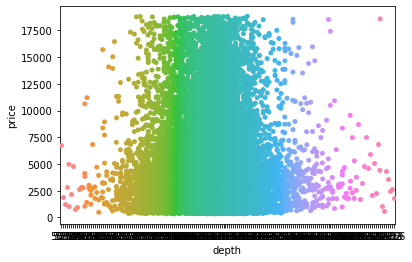

In [34]:
sns.stripplot(ds['depth'],ds['price'], jitter= True)

<AxesSubplot:xlabel='x', ylabel='price'>

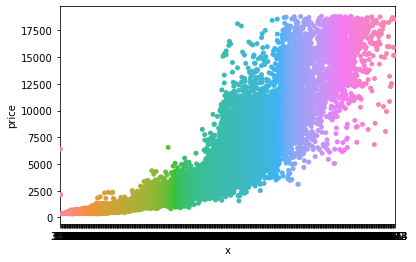

In [35]:
sns.stripplot(ds['x'],ds['price'], jitter= True)

<AxesSubplot:xlabel='y', ylabel='price'>

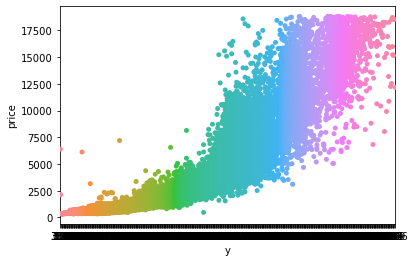

In [36]:
sns.stripplot(ds['y'],ds['price'], jitter= True)

<AxesSubplot:xlabel='z', ylabel='price'>

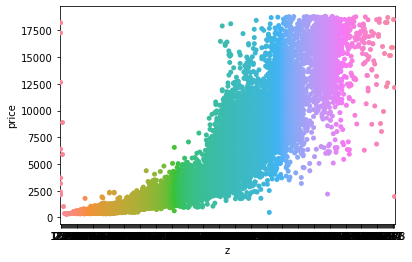

In [37]:
sns.stripplot(ds['z'],ds['price'], jitter= True)

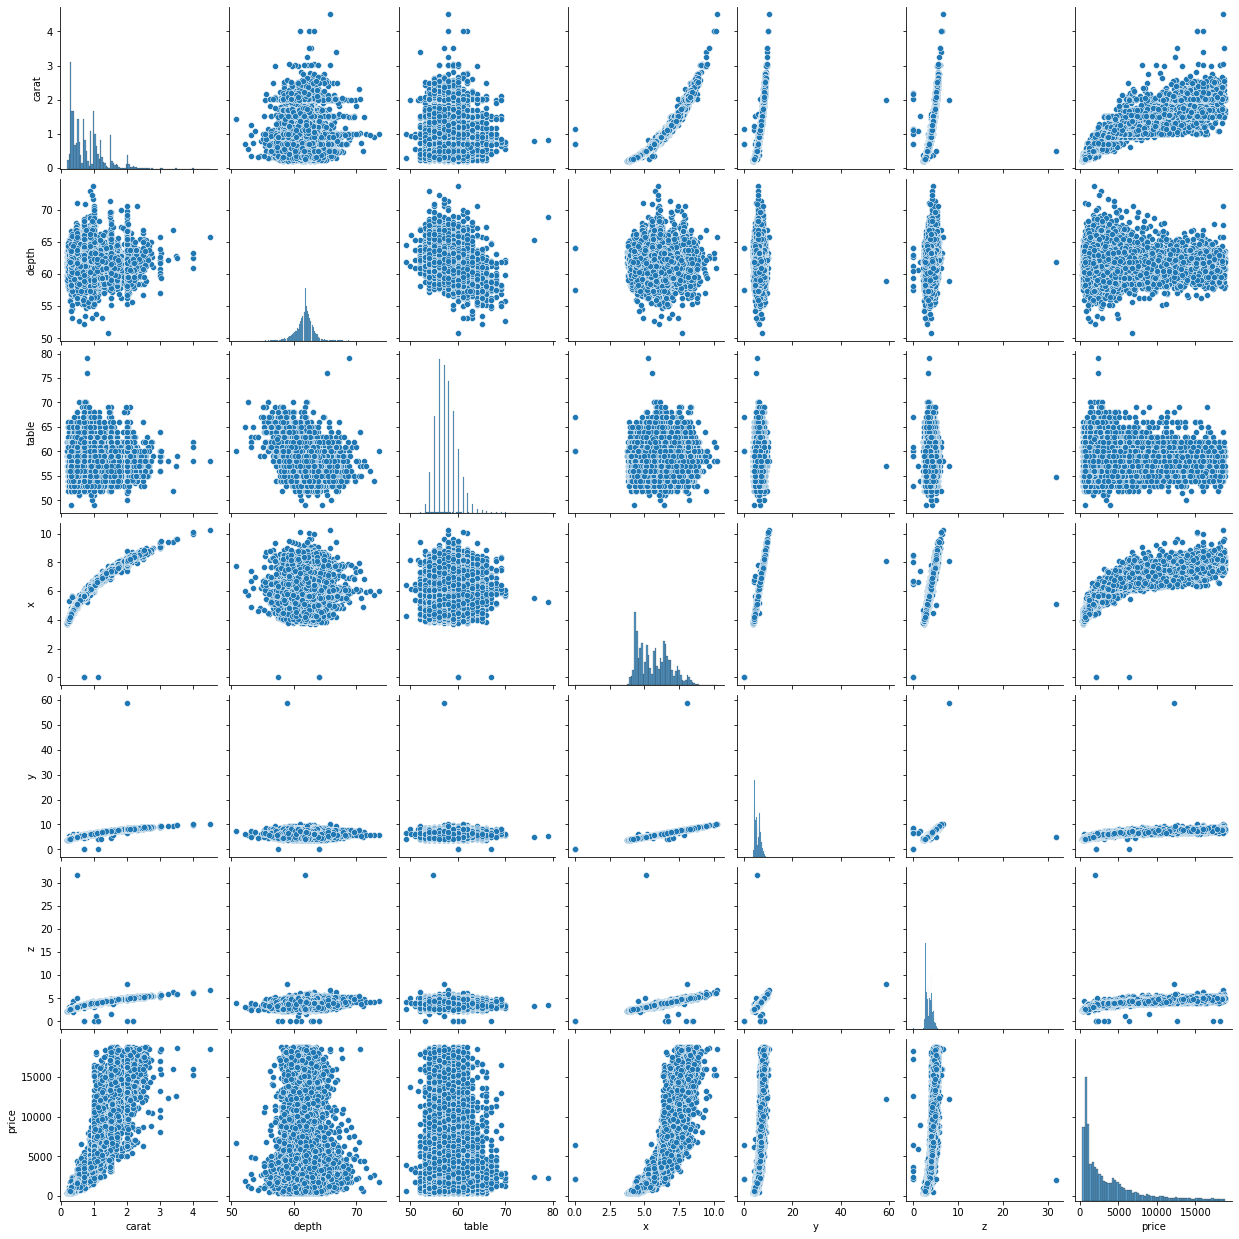

In [38]:
sns.pairplot(ds)

<AxesSubplot:>

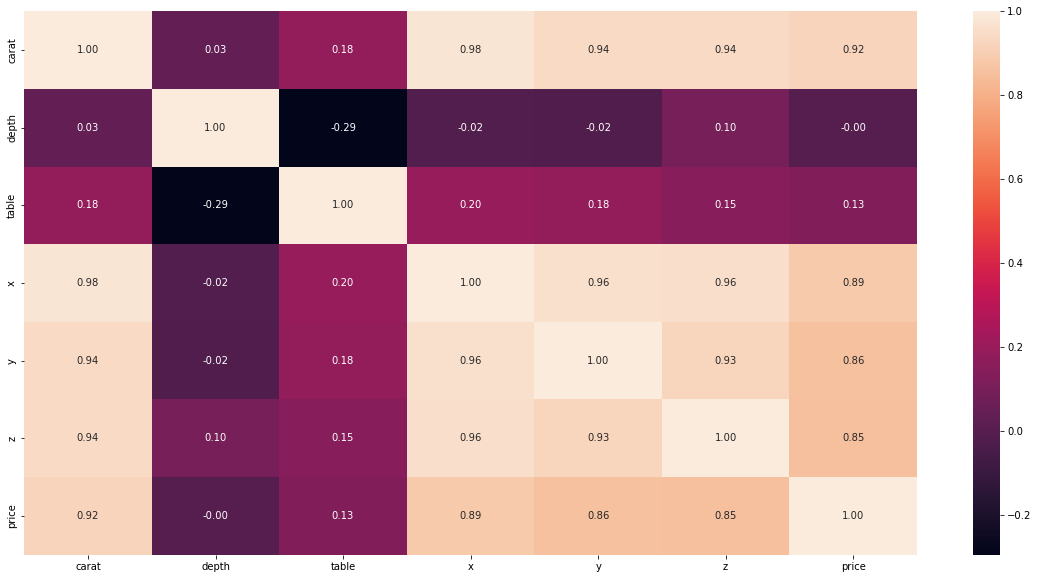

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(),annot=True,fmt=".2f")

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [40]:
ds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [41]:
ds[ds.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
6215   x    0.0
       y    0.0
       z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [42]:
ds.loc[((ds['x']==0)|(ds['y']==0)|(ds['z']==0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [43]:
ds.drop(ds[((ds['x']==0)|(ds['y']==0)|(ds['z']==0))].index,inplace=True)

In [44]:
for column in ds.columns:
    if ds[column].dtype != 'object':
        mean = ds[column].mean()
        ds[column] = ds[column].fillna(mean)
        
ds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [45]:
ds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [46]:
sc=StandardScaler()
numD=ds.select_dtypes(exclude=['object'])
ds[numD.columns]=sc.fit_transform(numD)

In [47]:
ds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


In [48]:
ds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

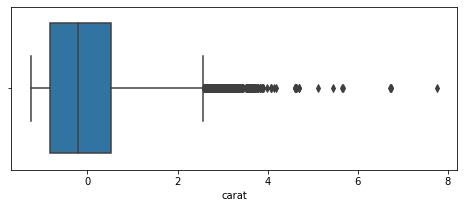

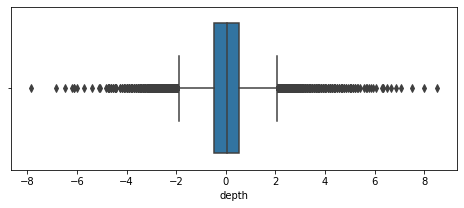

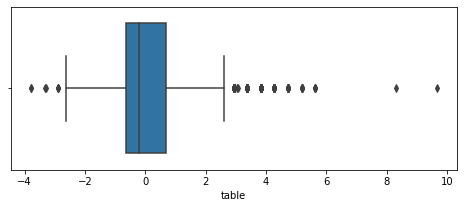

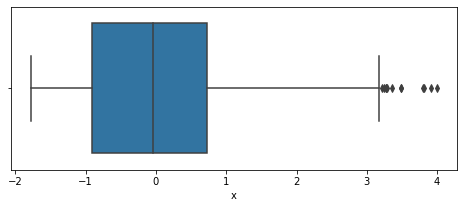

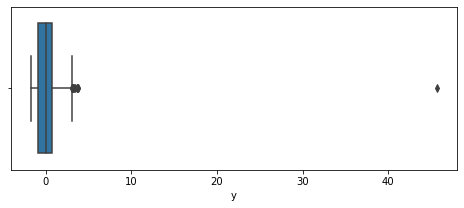

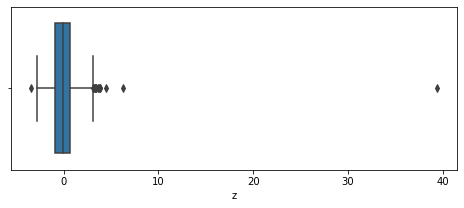

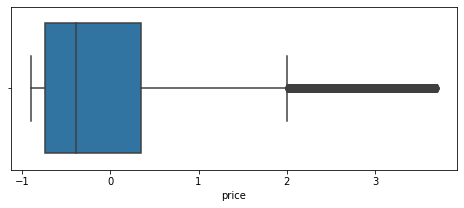

In [49]:
cols=['carat','depth','table','x','y','z','price']
for i in cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(ds[i])
    plt.show()

In [50]:
ds.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26958.0,NaN,NaN,NaN,-0.0,1.000019,-1.252508,-0.833742,-0.205593,0.527248,7.750963
cut,26958,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26958,7,G,5658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26958,8,SI1,6570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26958.0,NaN,NaN,NaN,0.0,1.000019,-7.852672,-0.463953,0.038193,0.540339,8.50294
table,26958.0,NaN,NaN,NaN,0.0,1.000019,-3.789618,-0.652273,-0.204081,0.692304,9.656147
x,26958.0,NaN,NaN,NaN,-0.0,1.000019,-1.775199,-0.905397,-0.035595,0.7277,3.993895
y,26958.0,NaN,NaN,NaN,0.0,1.000019,-1.738209,-0.877192,-0.029057,0.692394,45.66285
z,26958.0,NaN,NaN,NaN,0.0,1.000019,-3.439892,-0.890522,-0.026801,0.69761,39.370016
price,26958.0,NaN,NaN,NaN,-0.0,1.000019,-0.897851,-0.743997,-0.388566,0.352868,3.698393


In [51]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


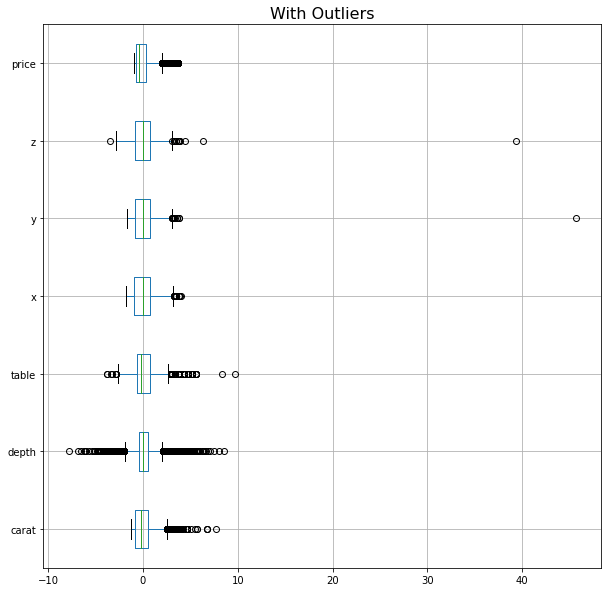

In [52]:
cont=ds.dtypes[(ds.dtypes!='uint8') & (ds.dtypes!='bool')].index
plt.figure(figsize=(10,10))
ds[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [53]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [54]:
for feature in ds[["carat","depth","table","x","y","z","price"]]:
    lr,ur=remove_outlier(ds[feature])
    ds[feature]=np.where(ds[feature]>ur,ur,ds[feature])
    ds[feature]=np.where(ds[feature]<lr,lr,ds[feature])

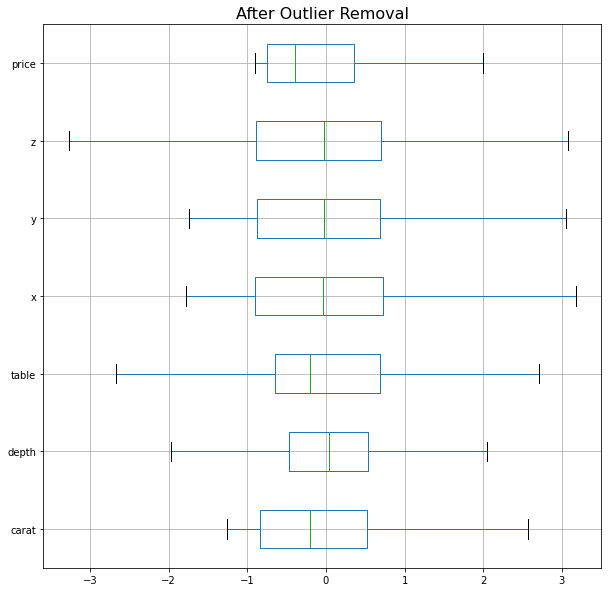

In [55]:
plt.figure(figsize=(10,10))
ds[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

<AxesSubplot:>

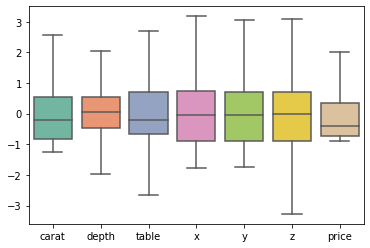

In [56]:
sns.boxplot(data=ds,orient="v",palette="Set2")

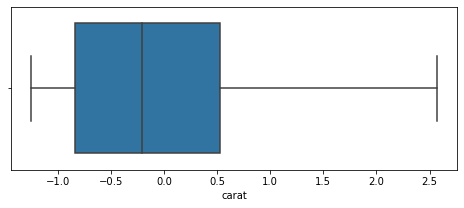

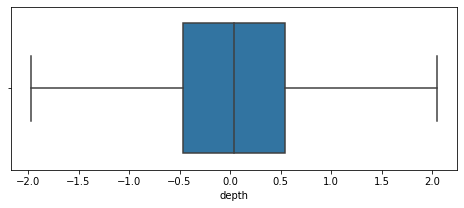

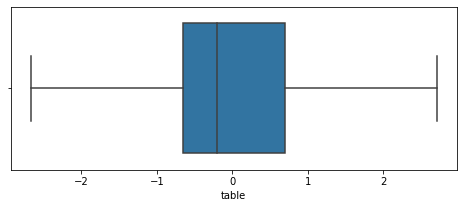

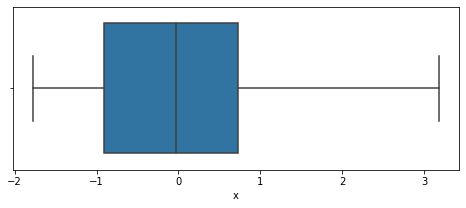

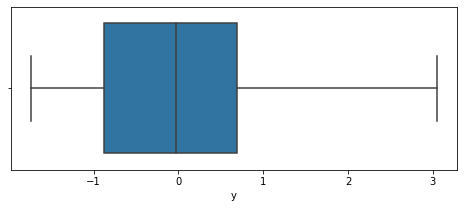

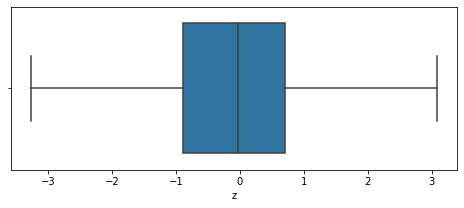

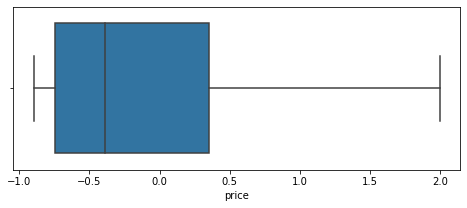

In [57]:
cols=['carat','depth','table','x','y','z','price']
for i in cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(ds[i])
    plt.show()

<AxesSubplot:>

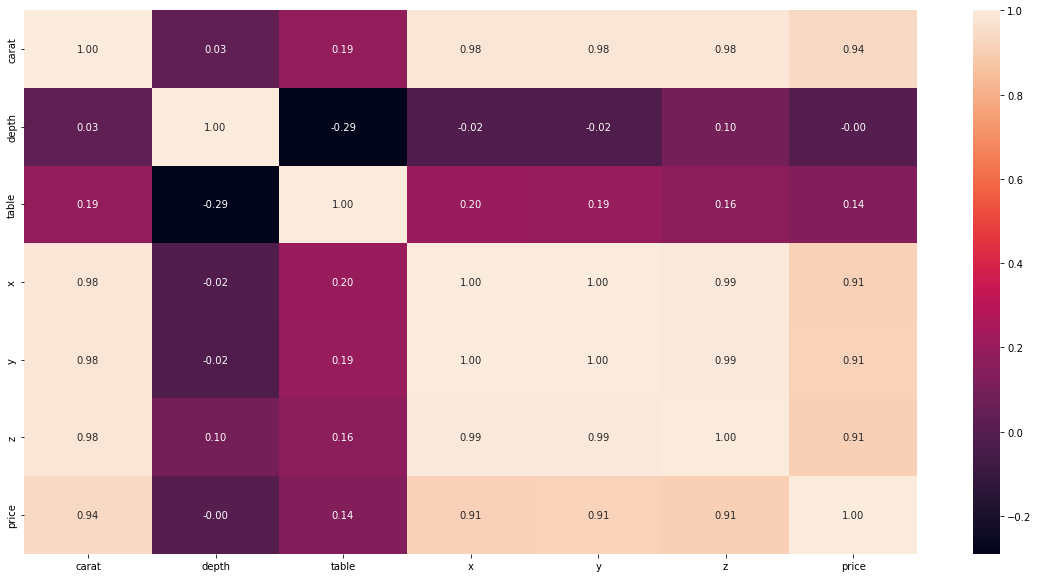

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(),annot=True,fmt=".2f")

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [59]:
ds_split = pd.get_dummies(ds, columns=['cut','color','clarity'],drop_first=True)

In [60]:
ds_split.head().T

,0,1,2,3,4
carat,-1.043125,-0.980310,0.213173,-0.791865,-1.022187
depth,0.253399,-0.679158,0.325134,-0.105277,-0.966099
table,0.244112,0.244112,1.140496,-0.652273,0.692304
x,-1.295920,-1.162787,0.275049,-0.807766,-1.224916
y,-1.240065,-1.094057,0.331668,-0.802041,-1.119823
z,-1.224865,-1.169142,0.335404,-0.806936,-1.238796
price,-0.854851,-0.734303,0.584271,-0.709945,-0.785257
cut_Good,0.000000,0.000000,0.000000,0.000000,0.000000
cut_Ideal,1.000000,0.000000,0.000000,1.000000,1.000000
cut_Premium,0.000000,1.000000,0.000000,0.000000,0.000000


In [61]:
ds_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26958 non-null  float64
 1   depth          26958 non-null  float64
 2   table          26958 non-null  float64
 3   x              26958 non-null  float64
 4   y              26958 non-null  float64
 5   z              26958 non-null  float64
 6   price          26958 non-null  float64
 7   cut_Good       26958 non-null  uint8  
 8   cut_Ideal      26958 non-null  uint8  
 9   cut_Premium    26958 non-null  uint8  
 10  cut_Very Good  26958 non-null  uint8  
 11  color_E        26958 non-null  uint8  
 12  color_F        26958 non-null  uint8  
 13  color_G        26958 non-null  uint8  
 14  color_H        26958 non-null  uint8  
 15  color_I        26958 non-null  uint8  
 16  color_J        26958 non-null  uint8  
 17  clarity_IF     26958 non-null  uint8  
 18  clarit

In [62]:
ds_split.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

### Extracting the target column into separate vectors for training set and test set

### Iteration-1

In [63]:
X = ds_split.drop('price', axis=1)
y = ds_split[['price']]

In [64]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting data into training and test set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Checking the dimensions of the training and test data

### Linear Regression Model

In [66]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [67]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for carat is 1.1009417847804512
The coefficient for depth is 0.0056051434455706645
The coefficient for table is -0.013319500386804255
The coefficient for x is -0.3050434981963348
The coefficient for y is 0.30391448957926764
The coefficient for z is -0.13916571567988092
The coefficient for cut_Good is 0.09403402912977939
The coefficient for cut_Ideal is 0.1523107462056743
The coefficient for cut_Premium is 0.14852774839849367
The coefficient for cut_Very Good is 0.125838818784527
The coefficient for color_E is -0.04705442233369834
The coefficient for color_F is -0.06268437439142852
The coefficient for color_G is -0.10072161838356827
The coefficient for color_H is -0.207673133116617
The coefficient for color_I is -0.3239541927462753
The coefficient for color_J is -0.4685893027501587
The coefficient for clarity_IF is 0.9997691394634917
The coefficient for clarity_SI1 is 0.638978581827134
The coefficient for clarity_SI2 is 0.4295966234831559
The coefficient for clarity_VS1 

In [68]:
intercept=regression_model.intercept_[0]
print('The intercept of our model is',intercept)

The intercept of our model is -0.756762786304939


In [69]:
regression_model.score(X_train, y_train)

0.9419557931252712

In [70]:
regression_model.score(X_test, y_test)

0.9381643998102491

### Predicting on Training and Test dataset

In [71]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.20690072466418796

In [72]:
predicted_test=regression_model.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.21573169582015334

In [73]:
vif=[variance_inflation_factor(X.values,ix) 
     for ix in range(X.shape[1])]

In [74]:
i=0
for column in X.columns:
    if i<11:
        print(column,"------>",vif[i])
        i=i+1

carat ------> 33.35086119845924
depth ------> 4.573918951598579
table ------> 1.7728852812618994
x ------> 463.5542785436457
y ------> 462.769821646584
z ------> 238.65819968687333
cut_Good ------> 3.609618194943713
cut_Ideal ------> 14.34812508118844
cut_Premium ------> 8.623414379121153
cut_Very Good ------> 7.848451571723688
color_E ------> 2.371070464762613


In [75]:
data_train=pd.concat([X_train,y_train],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [76]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [77]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [78]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [79]:
lm1=smf.ols(formula='price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2',data=data_train).fit()
lm1.params

Intercept       -0.756763
carat            1.100942
depth            0.005605
table           -0.013320
x               -0.305043
y                0.303914
z               -0.139166
cut_Good         0.094034
cut_Ideal        0.152311
cut_Premium      0.148528
cut_Very_Good    0.125839
color_E         -0.047054
color_F         -0.062684
color_G         -0.100722
color_H         -0.207673
color_I         -0.323954
color_J         -0.468589
clarity_IF       0.999769
clarity_SI1      0.638979
clarity_SI2      0.429597
clarity_VS1      0.838088
clarity_VS2      0.766024
clarity_VVS1     0.942077
clarity_VVS2     0.931367
dtype: float64

In [80]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        22:30:15   Log-Likelihood:                 2954.6
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18846   BIC:                            -5673.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7568      0.016    -46.999

In [81]:
mse=np.mean((regression_model.predict(X_test)-y_test)**2)

In [82]:
math.sqrt(mse)

0.21573169582015353

In [83]:
regression_model.score(X_test,y_test)

0.9385901200532557

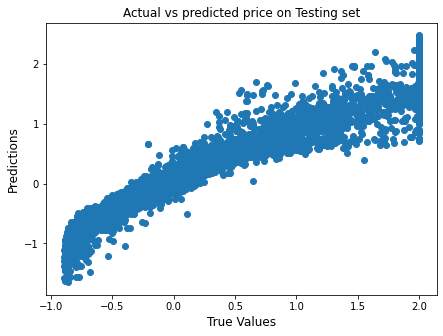

In [84]:
y_pred=regression_model.predict(X_test)
plt.figure(figsize=(7,5))
plt.title("Actual vs predicted price on Testing set")
plt.xlabel('True Values',fontsize=12)
plt.ylabel('Predictions',fontsize=12)
plt.scatter(y_test['price'],y_pred)

### Iteration-2

In [85]:
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [86]:
regression_model=LinearRegression()
regression_model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [87]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for carat is 1.2340452832654527
The coefficient for depth is 0.005683622106286934
The coefficient for table is -0.014925158711204846
The coefficient for x is -0.3535933711080489
The coefficient for y is 0.3384887509047404
The coefficient for z is -0.1565621156759557
The coefficient for cut_Good is 0.03155686617633954
The coefficient for cut_Ideal is 0.08694572471513153
The coefficient for cut_Premium is 0.0749826913066065
The coefficient for cut_Very Good is 0.061474546152396226
The coefficient for color_E is -0.021114047667946282
The coefficient for color_F is -0.02768408741673743
The coefficient for color_G is -0.047869270200836124
The coefficient for color_H is -0.08724911377113777
The coefficient for color_I is -0.1149318114675439
The coefficient for color_J is -0.1222362941816579
The coefficient for clarity_IF is 0.20897527243289749
The coefficient for clarity_SI1 is 0.31958216540654977
The coefficient for clarity_SI2 is 0.18720717259633018
The coefficient for clar

In [88]:
intercept=regression_model.intercept_[0]
print('The intercept of our model is',intercept)

The intercept of our model is 3.4739865560187e-17


In [89]:
regression_model.score(X_train_scaled,y_train_scaled)

0.9419557931252713

In [90]:
mse=np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [91]:
math.sqrt(mse)

0.24092365362232254

In [92]:
lm2=smf.ols(formula='price ~ carat + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2',data=data_train).fit()
lm2.params

Intercept       -0.756657
carat            1.101954
table           -0.013928
x               -0.315617
y                0.283420
z               -0.108789
cut_Good         0.095123
cut_Ideal        0.151173
cut_Premium      0.147355
cut_Very_Good    0.125514
color_E         -0.047114
color_F         -0.062727
color_G         -0.100657
color_H         -0.207568
color_I         -0.323689
color_J         -0.468428
clarity_IF       1.000046
clarity_SI1      0.639804
clarity_SI2      0.430195
clarity_VS1      0.838626
clarity_VS2      0.766683
clarity_VVS1     0.942390
clarity_VVS2     0.931898
dtype: float64

In [93]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        22:30:16   Log-Likelihood:                 2953.5
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18847   BIC:                            -5680.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      0.016    -46.991

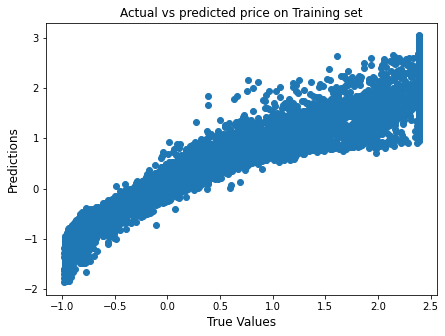

In [94]:
y_pred=regression_model.predict(X_train_scaled)
plt.figure(figsize=(7,5))
plt.title("Actual vs predicted price on Training set")
plt.xlabel('True Values',fontsize=12)
plt.ylabel('Predictions',fontsize=12)
plt.scatter(y_train_scaled['price'],y_pred)

In [95]:
vif=[variance_inflation_factor(X.values,ix) 
     for ix in range(X.shape[1])]

In [96]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.76) * Intercept + (1.1) * carat + (0.01) * depth + (-0.01) * table + (-0.31) * x + (0.3) * y + (-0.14) * z + (0.09) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 

In [97]:
i=0
for column in X.columns:
    if i< 11 :
        print(column,"------>", vif[i])
        i=i+1

carat ------> 33.35086119845924
depth ------> 4.573918951598579
table ------> 1.7728852812618994
x ------> 463.5542785436457
y ------> 462.769821646584
z ------> 238.65819968687333
cut_Good ------> 3.609618194943713
cut_Ideal ------> 14.34812508118844
cut_Premium ------> 8.623414379121153
cut_Very Good ------> 7.848451571723688
color_E ------> 2.371070464762613


# Problem 2 - Holiday Package Data Analysis

In [98]:
ds1=pd.read_csv('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/Session 5- Predictive Modeling and Analytics/Project/Datasets/Holiday_Package.csv')
ds1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [99]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [100]:
row, col = ds1.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 872 rows and 8 columns in the dataset


In [101]:
ds1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [102]:
ds1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
ds1.isnull().any()

Unnamed: 0           False
Holliday_Package     False
Salary               False
age                  False
educ                 False
no_young_children    False
no_older_children    False
foreign              False
dtype: bool

In [104]:
ds1.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [105]:
ds1.duplicated().sum()

0

In [106]:
dups=ds1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [107]:
ds1.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [108]:
ds1.drop(["Unnamed: 0"],axis=1,inplace=True)

In [109]:
ds1.skew(axis=0,skipna=True)

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [110]:
ds1.kurtosis(axis=0,skipna=True)

Salary               15.852557
age                  -0.909962
educ                  0.005558
no_young_children     3.109892
no_older_children     0.676017
dtype: float64

In [111]:
for column in ds1.columns:
    if ds1[column].dtype !='object':
        median=ds1[column].median()
        ds1[column]=ds1[column].fillna(median)
ds1.isnull().sum()  

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [112]:
def detect_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [113]:
lr1,ur1=detect_outlier(ds1['Salary'])
lr2,ur2=detect_outlier(ds1['age'])
lr3,ur3=detect_outlier(ds1['educ'])
lr4,ur4=detect_outlier(ds1['no_young_children'])
lr5,ur5=detect_outlier(ds1['no_older_children'])
print("lower range",lr1,"upper range",ur1)
print("lower range",lr2,"upper range",ur2)
print("lower range",lr3,"upper range",ur3)
print("lower range",lr4,"upper range",ur4)
print("lower range",lr5,"upper range",ur5)

lower range 8105.75 upper range 80687.75
lower range 8.0 upper range 72.0
lower range 2.0 upper range 18.0
lower range 0.0 upper range 0.0
lower range -3.0 upper range 5.0


In [114]:
num = ds1.select_dtypes(include=['int','float']).columns

In [115]:
def proportion(x):
        xs = pd.Series(sorted(ds1[x]))
        Q3 = xs.quantile(q=0.75)
        Q1 = xs.quantile(q=0.25)
        IQR = Q3-Q1
        LR = Q1-(1.5*IQR)
        UR = Q3+(1.5*IQR)
        
        data = ds1[x]
        count = 0
        for value in data:
            if(value<LR) or (value>UR):
                count += 1
            else:
                pass

        _proportion = round((count/len(ds1[x]))*100,2)
        print('Outlier proportion: {}: {}%'.format(x, _proportion))

In [116]:
for i in num:
    proportion(i)

Outlier proportion: Salary: 6.54%
Outlier proportion: age: 0.0%
Outlier proportion: educ: 0.46%
Outlier proportion: no_young_children: 23.74%
Outlier proportion: no_older_children: 0.23%


In [117]:
corr1=ds1.corr()
round(corr1,2)

,Salary,age,educ,no_young_children,no_older_children
Salary,1.00,0.07,0.33,-0.03,0.11
age,0.07,1.00,-0.15,-0.52,-0.12
educ,0.33,-0.15,1.00,0.10,-0.04
no_young_children,-0.03,-0.52,0.10,1.00,-0.24
no_older_children,0.11,-0.12,-0.04,-0.24,1.00


<AxesSubplot:>

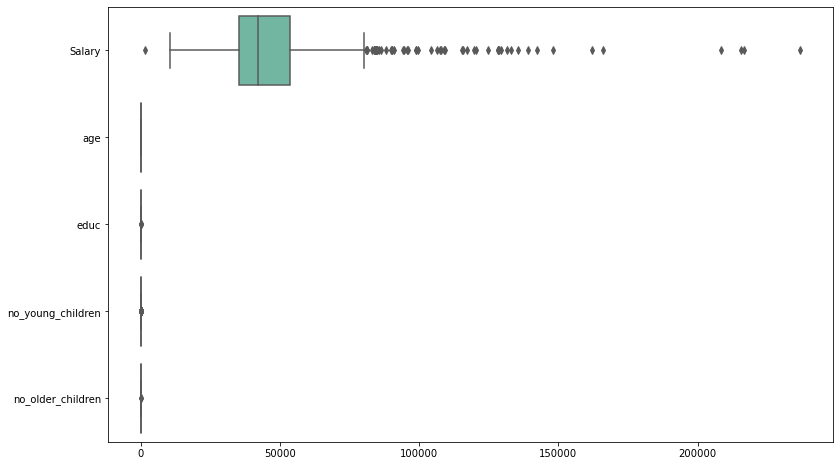

In [118]:
plt.figure(figsize=(13,8))
sns.boxplot(data=ds1,orient="h", palette="Set2")

In [119]:
ds1.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [120]:
ds1[['Salary','age','educ','no_young_children','no_older_children']].nunique()

Salary               864
age                   43
educ                  20
no_young_children      4
no_older_children      7
dtype: int64

In [121]:
ds1[['Salary','age','educ']].describe()

,Salary,age,educ
count,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339
std,23418.668531,10.551675,3.036259
min,1322.000000,20.000000,1.000000
25%,35324.000000,32.000000,8.000000
50%,41903.500000,39.000000,9.000000
75%,53469.500000,48.000000,12.000000
max,236961.000000,62.000000,21.000000


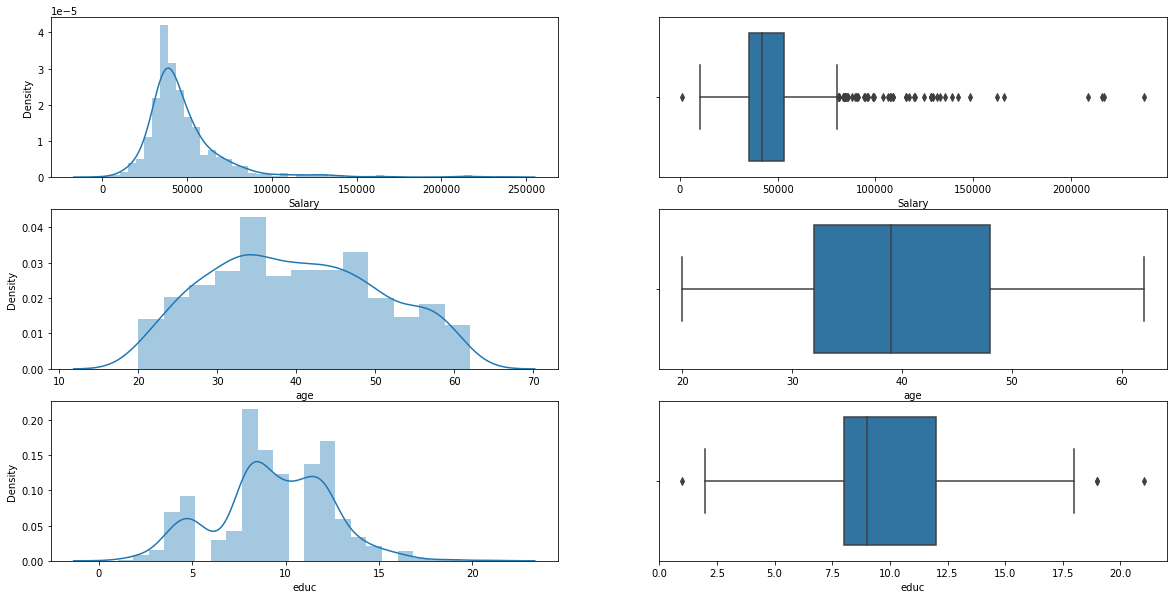

In [122]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds1['Salary'],kde=True,ax=axes[0][0])
sns.boxplot(x='Salary',data=ds1,ax=axes[0][1])
sns.distplot(ds1['age'],kde=True,ax=axes[1][0])
sns.boxplot(x='age',data=ds1,ax=axes[1][1])
sns.distplot(ds1['educ'],kde=True,ax=axes[2][0])
sns.boxplot(x='educ',data=ds1,ax=axes[2][1])
plt.show()

In [123]:
ds1[['no_young_children','no_older_children']].describe()

,no_young_children,no_older_children
count,872.000000,872.000000
mean,0.311927,0.982798
std,0.612870,1.086786
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,3.000000,6.000000


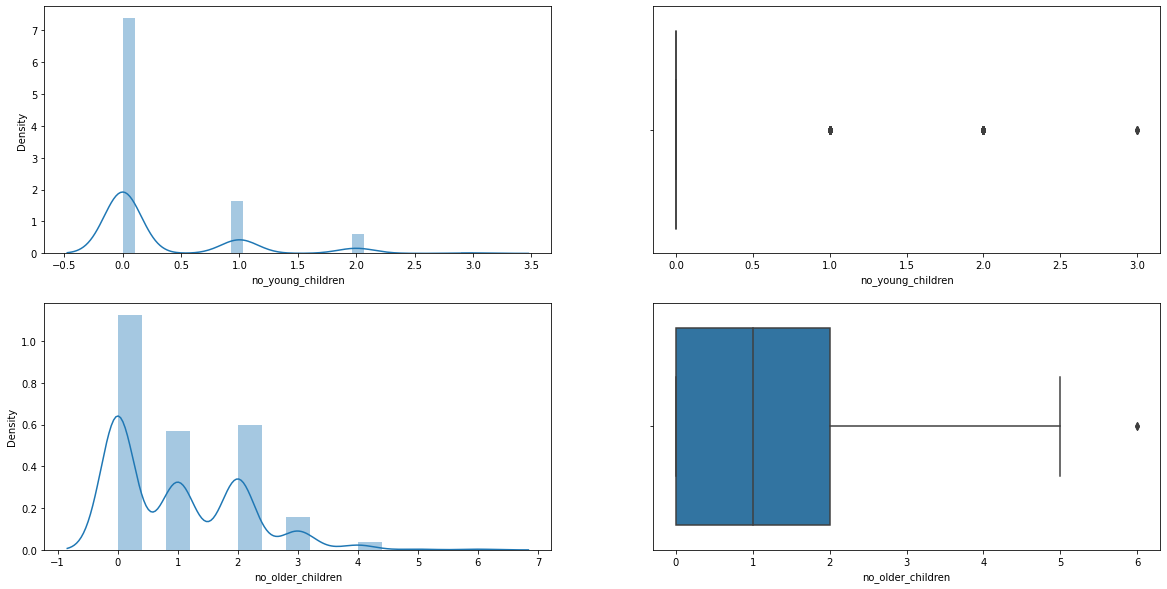

In [124]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds1['no_young_children'],kde=True,ax=axes[0][0])
sns.boxplot(x='no_young_children',data=ds1,ax=axes[0][1])
sns.distplot(ds1['no_older_children'],kde=True,ax=axes[1][0])
sns.boxplot(x='no_older_children',data=ds1,ax=axes[1][1])
plt.show()

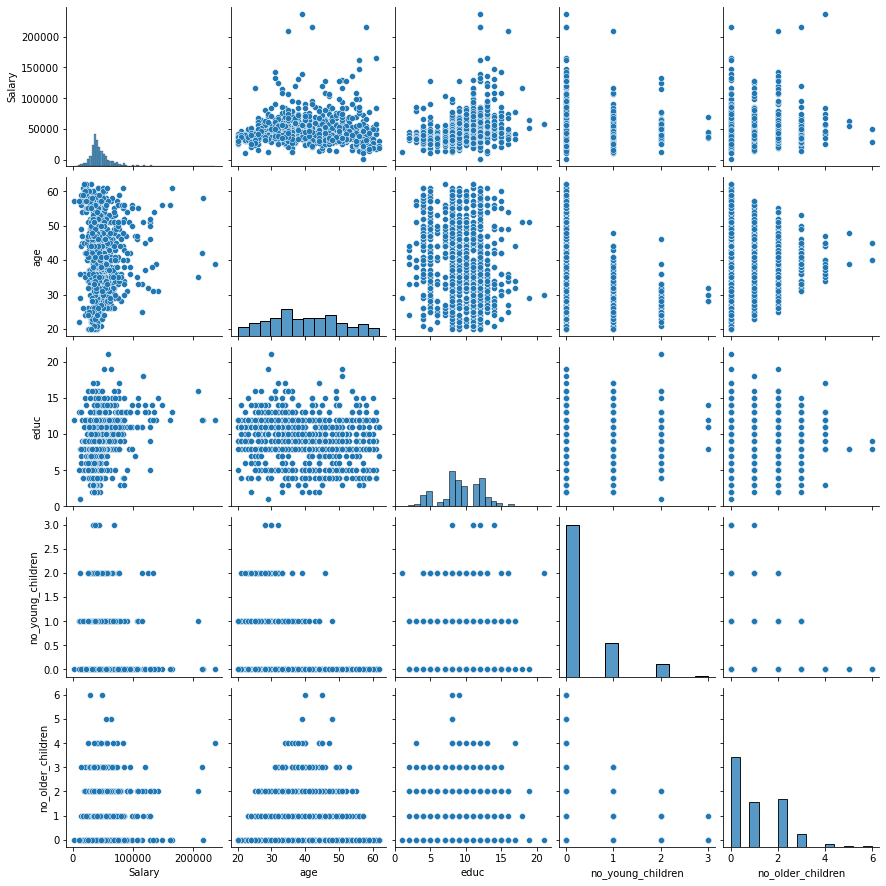

In [125]:
sns.pairplot(ds1)

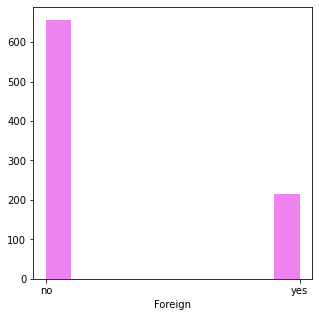

In [126]:
plt.figure(figsize=(5,5))
plt.hist(ds1['foreign'], color='violet')
plt.xlabel('Foreign')
plt.show()

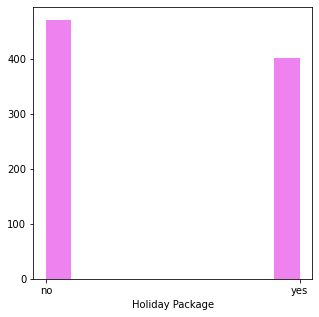

In [127]:
plt.figure(figsize=(5,5))
plt.hist(ds1['Holliday_Package'], color='violet')
plt.xlabel('Holiday Package')
plt.show()

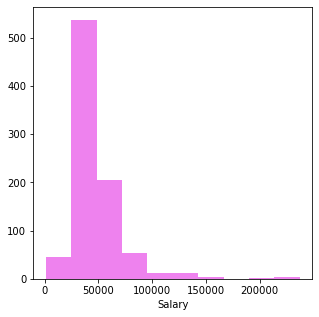

In [128]:
plt.figure(figsize=(5,5))
plt.hist(ds1['Salary'], color='violet')
plt.xlabel('Salary')
plt.show()

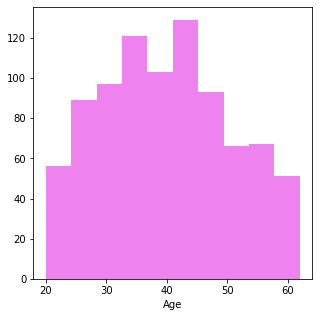

In [129]:
plt.figure(figsize=(5,5))
plt.hist(ds1['age'], color='violet')
plt.xlabel('Age')
plt.show()

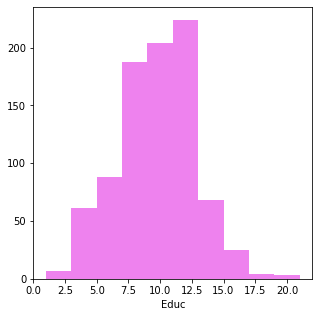

In [130]:
plt.figure(figsize=(5,5))
plt.hist(ds1['educ'], color='violet')
plt.xlabel('Educ')
plt.show()

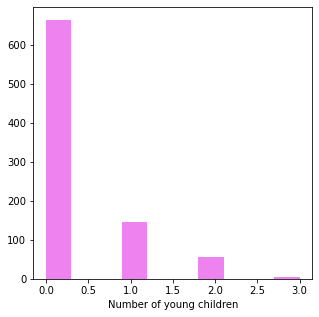

In [131]:
plt.figure(figsize=(5,5))
plt.hist(ds1['no_young_children'], color='violet')
plt.xlabel('Number of young children')
plt.show()

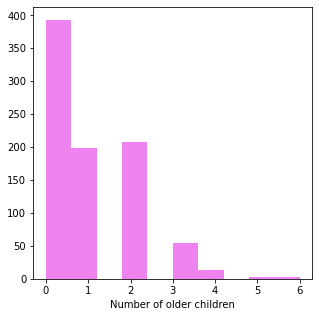

In [132]:
plt.figure(figsize=(5,5))
plt.hist(ds1['no_older_children'], color='violet')
plt.xlabel('Number of older children')
plt.show()

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

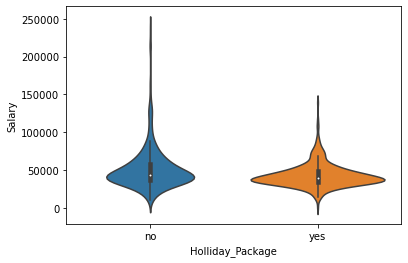

In [133]:
sns.violinplot(x=ds1['Holliday_Package'],y=ds1['Salary'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

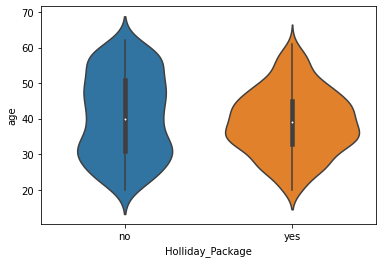

In [135]:
sns.violinplot(x=ds1['Holliday_Package'],y=ds1['age'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

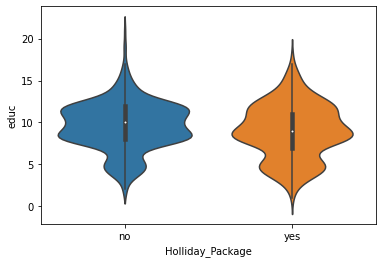

In [136]:
sns.violinplot(x=ds1['Holliday_Package'],y=ds1['educ'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

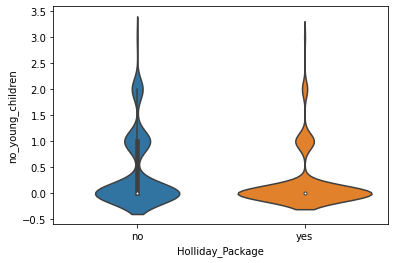

In [137]:
sns.violinplot(x=ds1['Holliday_Package'],y=ds1['no_young_children'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

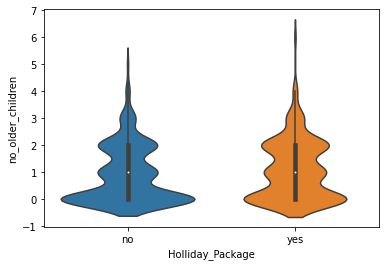

In [138]:
sns.violinplot(x=ds1['Holliday_Package'],y=ds1['no_older_children'])

<AxesSubplot:>

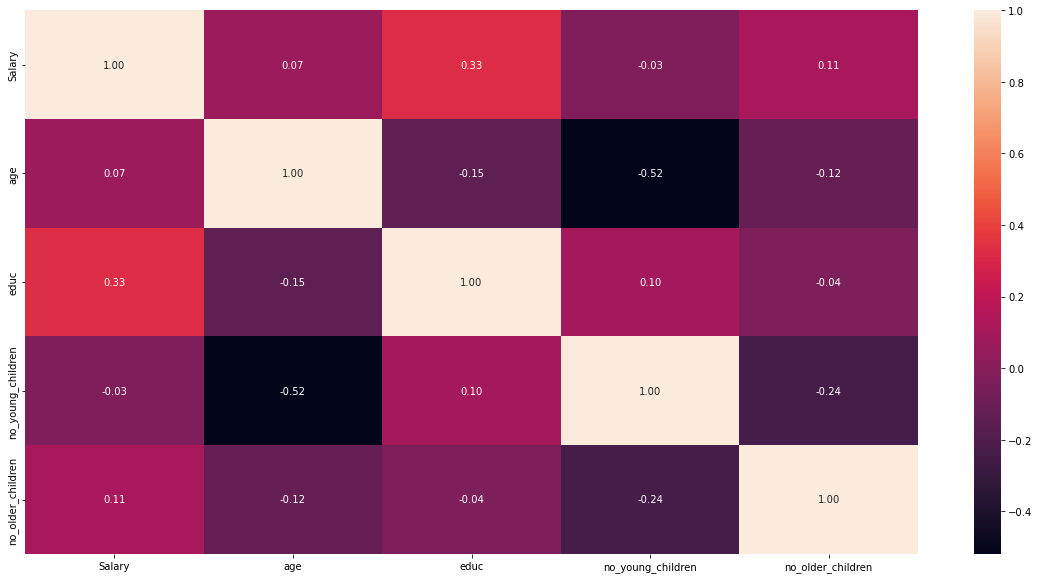

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(ds1.corr(),annot=True,fmt=".2f")

In [140]:
ds1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [141]:
ds1 = pd.get_dummies(ds1, columns=['Holliday_Package','foreign'],drop_first=True)

In [142]:
ds1.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


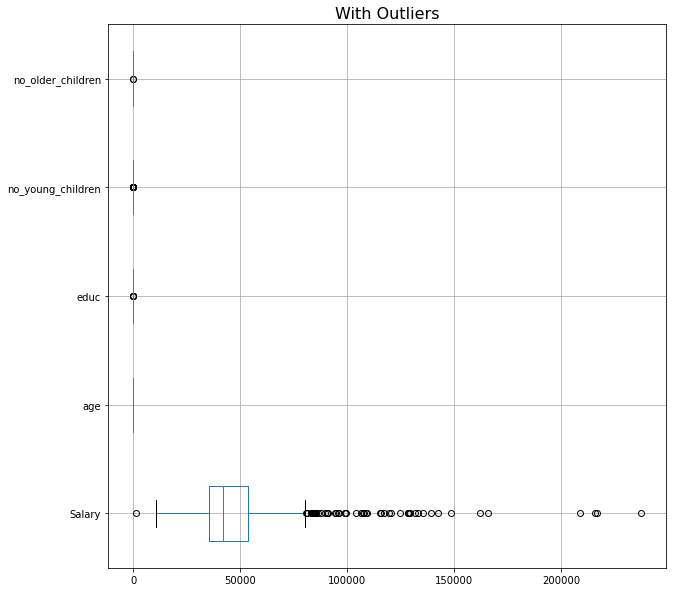

In [143]:
cont=ds1.dtypes[(ds1.dtypes!='uint8') & (ds1.dtypes!='bool')].index
plt.figure(figsize=(10,10))
ds1[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [144]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [145]:
for column in ds1[cont].columns:
    lr,ur=remove_outlier(ds1[column])
    ds1[column]=np.where(ds1[column]>ur,ur,ds1[column])
    ds1[column]=np.where(ds1[column]<lr,lr,ds1[column])

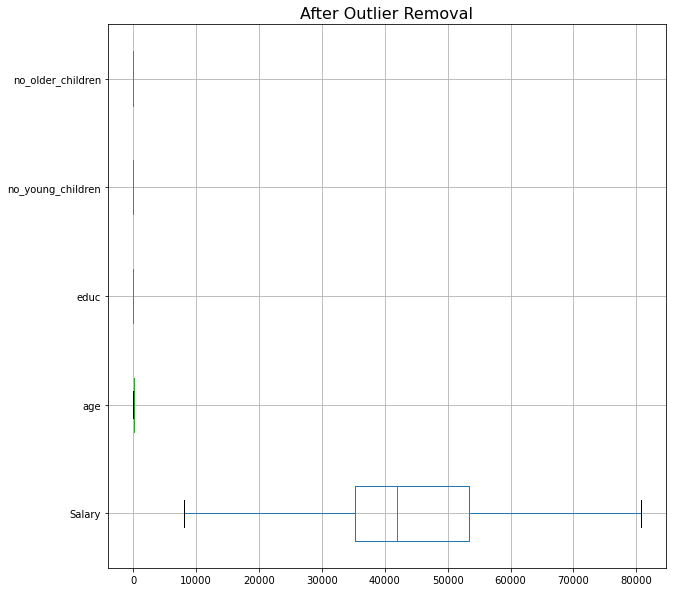

In [146]:
plt.figure(figsize=(10,10))
ds1[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

<AxesSubplot:>

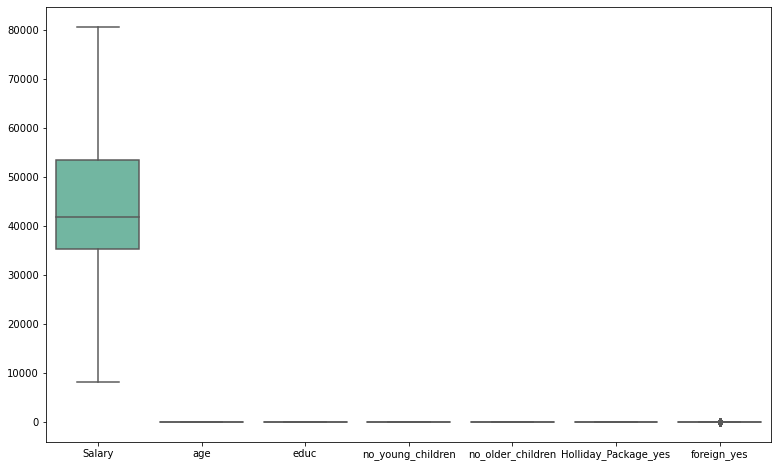

In [147]:
plt.figure(figsize=(13,8))
sns.boxplot(data=ds1,orient="v",palette="Set2")

In [148]:
ds1["no_young_children"]=ds1["no_young_children"].astype("object")
ds1["no_older_children"]=ds1["no_older_children"].astype("object")
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                872 non-null    float64
 1   age                   872 non-null    float64
 2   educ                  872 non-null    float64
 3   no_young_children     872 non-null    object 
 4   no_older_children     872 non-null    object 
 5   Holliday_Package_yes  872 non-null    uint8  
 6   foreign_yes           872 non-null    uint8  
dtypes: float64(3), object(2), uint8(2)
memory usage: 35.9+ KB


In [149]:
for column in ds1.columns:
    if ds1[column].dtype=='object':
        print(column.upper(),': ',ds1[column].nunique())
        print(ds1[column].value_counts().sort_values())
        print('\n')

NO_YOUNG_CHILDREN :  1
0.0    872
Name: no_young_children, dtype: int64


NO_OLDER_CHILDREN :  6
5.0      4
4.0     14
3.0     55
1.0    198
2.0    208
0.0    393
Name: no_older_children, dtype: int64




### Extracting the target column into separate vectors for training set and test set

In [150]:
x= ds1.drop('Holliday_Package_yes',axis=1)
y= ds1.pop('Holliday_Package_yes')
x.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0
1,37207.0,45.0,8.0,0.0,1.0,0
2,58022.0,46.0,9.0,0.0,0.0,0
3,66503.0,31.0,11.0,0.0,0.0,0
4,66734.0,44.0,12.0,0.0,2.0,0


### Splitting data into training and test set

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Checking the dimensions of the training and test data

In [152]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (610, 6)
x_test (262, 6)
y_train (610,)
y_test (262,)


In [153]:
y_train.value_counts(1)

0    0.534426
1    0.465574
Name: Holliday_Package_yes, dtype: float64

In [154]:
y_test.value_counts(1)

0    0.553435
1    0.446565
Name: Holliday_Package_yes, dtype: float64

### Logistic Regression

In [155]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [1]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

NameError: name 'model' is not defined

In [157]:
y_test_predict_prob=model.predict_proba(x_test)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.696808,0.303192
1,0.332208,0.667792
2,0.620127,0.379873
3,0.686887,0.313113
4,0.354966,0.645034


In [158]:
lr_train_acc=model.score(x_train,y_train)
lr_train_acc

0.6409836065573771

In [159]:
confusion_matrix(y_train,y_train_predict)

array([[265,  61],
       [158, 126]], dtype=int64)

In [160]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



Area under Curve is : 0.667


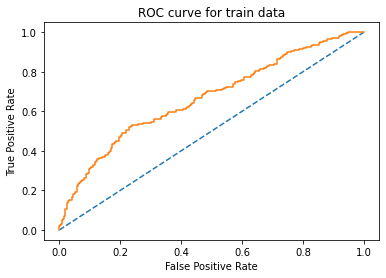

In [161]:
probs = model.predict_proba(x_train) 
probs = probs[:, 1]
lr_train_auc = roc_auc_score(y_train, probs)
print('Area under Curve is : %.3f' % lr_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

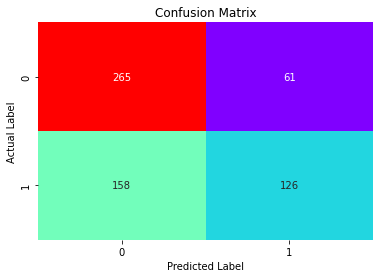

In [162]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [163]:
y_train_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [164]:
lr_test_acc=model.score(x_test,y_test)
lr_test_acc

0.6297709923664122

In [165]:
confusion_matrix(y_test,y_test_predict)

array([[113,  32],
       [ 65,  52]], dtype=int64)

In [166]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



Area under Curve is: 0.661


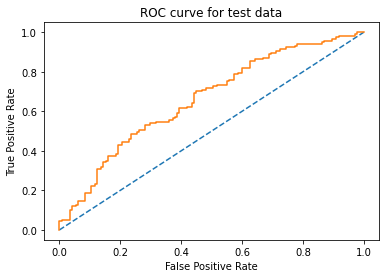

In [167]:
probs = model.predict_proba(x_test) 
probs = probs[:, 1]
lr_test_auc = roc_auc_score(y_test, probs)
print('Area under Curve is: %.3f' % lr_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

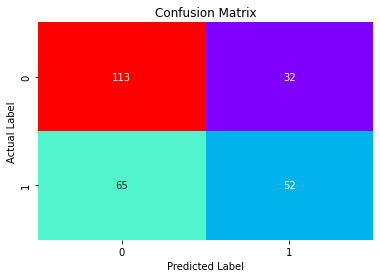

In [168]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label') 
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [169]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [170]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [171]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [172]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [173]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [174]:
best_model = grid_search.best_estimator_

In [175]:
y_train_predict_1 = best_model.predict(x_train)
y_test_predict_1 = best_model.predict(x_test)

In [176]:
y_test_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.591059,0.408941
1,0.540421,0.459579
2,0.548785,0.451215
3,0.598271,0.401729
4,0.530048,0.469952


              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610
 



C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


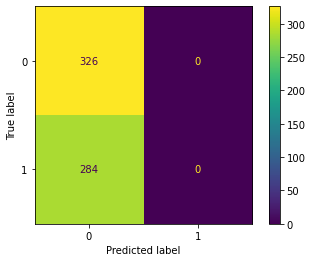

In [177]:
plot_confusion_matrix(best_model,x_train,y_train)
print(classification_report(y_train, y_train_predict_1),'\n');

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262
 



C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dheepig\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


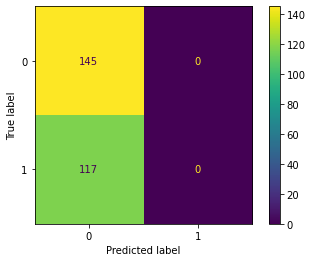

In [178]:
plot_confusion_matrix(best_model,x_test,y_test)
print(classification_report(y_test, y_test_predict_1),'\n');

### Linear Discriminant Analysis

In [179]:
x1=x
y1=y

In [180]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=1)

In [181]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(x1_train,y1_train)

In [182]:
pred_class_train = model.predict(x1_train)
pred_class_test = model.predict(x1_test)

In [183]:
clf.fit(x1_train,y1_train)
clf.fit(x1_test,y1_test)

LinearDiscriminantAnalysis()

In [184]:
lda_test_acc=model.score(x1_test,y1_test)
lda_test_acc

0.6335877862595419

In [185]:
lda_train_acc=model.score(x1_train,y1_train)
lda_train_acc

0.6459016393442623

### Predicting on Training and Testing Data

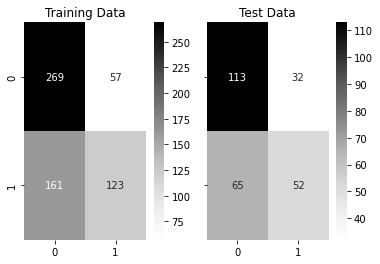

In [186]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [187]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



### Getting the predicted class and probabilities

In [188]:
pred_prob_train = model.predict_proba(x1_train)
pred_prob_test = model.predict_proba(x1_test)

In [189]:
pred_prob_train[:,1]

array([0.43116885, 0.68563683, 0.16017415, 0.19080105, 0.39736601,
       0.69709804, 0.27076924, 0.21449062, 0.14023983, 0.41160951,
       0.33024692, 0.25087644, 0.3219228 , 0.2980825 , 0.30880765,
       0.73934597, 0.83503823, 0.3746479 , 0.43398241, 0.67401483,
       0.41196229, 0.14440023, 0.53191112, 0.38524619, 0.55133968,
       0.24924473, 0.47757583, 0.41839386, 0.64559534, 0.42684893,
       0.70173484, 0.67124312, 0.34233932, 0.35353619, 0.45413911,
       0.33586442, 0.47505331, 0.36209199, 0.27028139, 0.22732624,
       0.19398097, 0.4482491 , 0.44095944, 0.48404628, 0.26535101,
       0.74982984, 0.30896479, 0.37464253, 0.36353565, 0.333022  ,
       0.42134197, 0.2652641 , 0.44667885, 0.27887318, 0.62007646,
       0.43968394, 0.46637626, 0.22605807, 0.67772722, 0.59305605,
       0.24478336, 0.42592188, 0.46614681, 0.55581489, 0.40444039,
       0.29434103, 0.42341453, 0.68755673, 0.13254305, 0.38251745,
       0.18436773, 0.33658078, 0.43242507, 0.70467881, 0.34100

In [190]:
pred_prob_test[:,1]

array([0.18125424, 0.6688383 , 0.41148543, 0.17801535, 0.66678852,
       0.19974663, 0.21198132, 0.35921408, 0.32562559, 0.26595012,
       0.20232368, 0.27522701, 0.22678431, 0.66258296, 0.50158498,
       0.48142949, 0.73815028, 0.19700211, 0.40546714, 0.22766332,
       0.53920448, 0.6728852 , 0.61153548, 0.47136538, 0.70576062,
       0.68896866, 0.29531584, 0.35386366, 0.44749157, 0.40697558,
       0.57675039, 0.39886209, 0.80741875, 0.41219483, 0.40893706,
       0.62459984, 0.38299456, 0.51808006, 0.45928575, 0.38673136,
       0.65099042, 0.67548498, 0.33643   , 0.69943561, 0.60941497,
       0.39776105, 0.51357497, 0.50739898, 0.44276335, 0.42356103,
       0.48569784, 0.51300185, 0.4193782 , 0.43338161, 0.64072391,
       0.15355711, 0.49782306, 0.33707412, 0.46329811, 0.40123226,
       0.42453381, 0.17531437, 0.19246931, 0.40132371, 0.48902691,
       0.71495799, 0.58031979, 0.68064823, 0.64041532, 0.21541696,
       0.30479139, 0.39148921, 0.28705499, 0.24007053, 0.39146

### AUC and ROC for the training data

In [191]:
lr_train_acc=model.score(x1_train,y1_train)
lr_train_acc

0.6459016393442623

Area under Curve is: 0.643


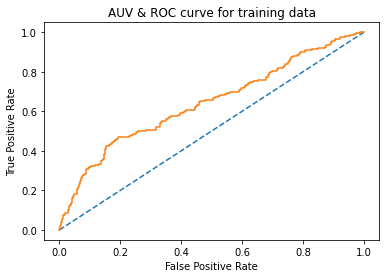

In [192]:
probs = model.predict_proba(x1_train) 
probs = probs[:, 1]
lda_train_auc = roc_auc_score(y1_train, probs)
print('Area under Curve is: %.3f' % lda_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUV & ROC curve for training data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 



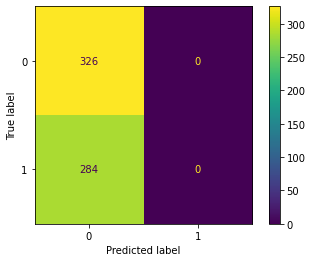

In [193]:
plot_confusion_matrix(best_model,x1_train,y1_train)
print(classification_report(y1_train, pred_class_train),'\n');

### Testing set Accuracy

In [194]:
lr_test_acc=model.score(x1_test,y1_test)
lr_test_acc

0.6335877862595419

Area under Curve is: 0.686


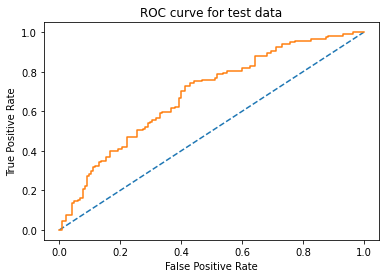

In [195]:
probs = model.predict_proba(x1_test) 
probs = probs[:, 1]
lda_test_auc = roc_auc_score(y1_test, probs)
print('Area under Curve is: %.3f' % lda_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [196]:
pred_prob_test[:,1]

array([0.18125424, 0.6688383 , 0.41148543, 0.17801535, 0.66678852,
       0.19974663, 0.21198132, 0.35921408, 0.32562559, 0.26595012,
       0.20232368, 0.27522701, 0.22678431, 0.66258296, 0.50158498,
       0.48142949, 0.73815028, 0.19700211, 0.40546714, 0.22766332,
       0.53920448, 0.6728852 , 0.61153548, 0.47136538, 0.70576062,
       0.68896866, 0.29531584, 0.35386366, 0.44749157, 0.40697558,
       0.57675039, 0.39886209, 0.80741875, 0.41219483, 0.40893706,
       0.62459984, 0.38299456, 0.51808006, 0.45928575, 0.38673136,
       0.65099042, 0.67548498, 0.33643   , 0.69943561, 0.60941497,
       0.39776105, 0.51357497, 0.50739898, 0.44276335, 0.42356103,
       0.48569784, 0.51300185, 0.4193782 , 0.43338161, 0.64072391,
       0.15355711, 0.49782306, 0.33707412, 0.46329811, 0.40123226,
       0.42453381, 0.17531437, 0.19246931, 0.40132371, 0.48902691,
       0.71495799, 0.58031979, 0.68064823, 0.64041532, 0.21541696,
       0.30479139, 0.39148921, 0.28705499, 0.24007053, 0.39146

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



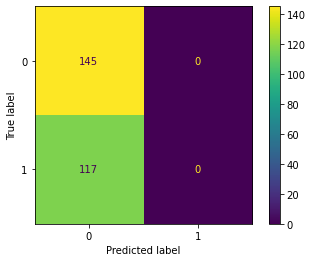

In [197]:
plot_confusion_matrix(best_model,x1_test,y1_test)
print(classification_report(y1_test, pred_class_test),'\n');

## Confusion Matrix & classification reports

In [198]:
confusion_matrix(y1_train,pred_class_train)

array([[269,  57],
       [161, 123]], dtype=int64)

In [199]:
print(classification_report(y1_train,pred_class_train))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [200]:
confusion_matrix(y1_test,pred_class_test)

array([[113,  32],
       [ 65,  52]], dtype=int64)

In [201]:
print(classification_report(y1_test,pred_class_test))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



In [202]:
pred_prob_train = model.predict_proba(x1_train)
pred_prob_test = model.predict_proba(x1_test)

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

AUC for the Training Data: 0.643
AUC for the Test Data: 0.686


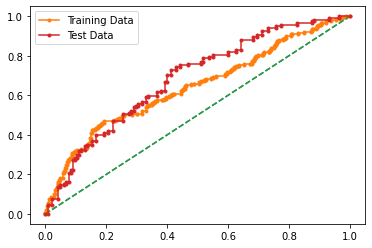

In [203]:
auc = metrics.roc_auc_score(y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


auc = metrics.roc_auc_score(y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()



0.1 

Accuracy Score 0.4656
F1 Score 0.6353 

Confusion Matrix


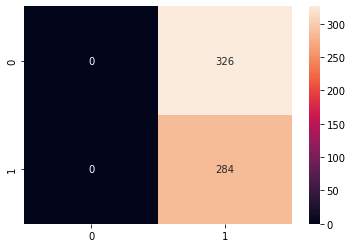

0.2 

Accuracy Score 0.4951
F1 Score 0.641 

Confusion Matrix


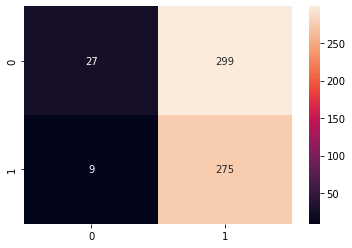

0.3 

Accuracy Score 0.5262
F1 Score 0.6242 

Confusion Matrix


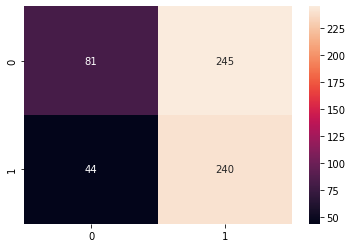

0.4 

Accuracy Score 0.5869
F1 Score 0.5855 

Confusion Matrix


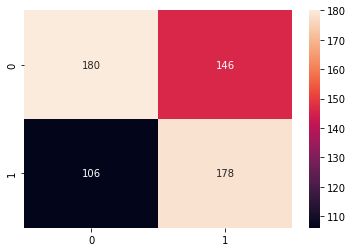

0.5 

Accuracy Score 0.6459
F1 Score 0.5284 

Confusion Matrix


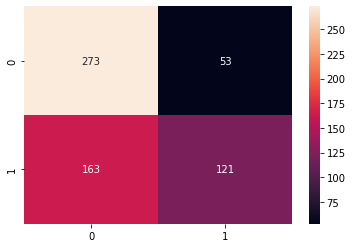

0.6 

Accuracy Score 0.6262
F1 Score 0.4412 

Confusion Matrix


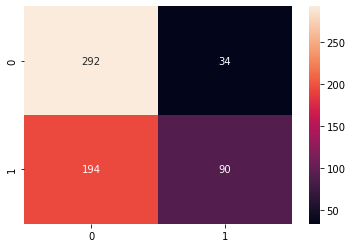

0.7 

Accuracy Score 0.5656
F1 Score 0.1796 

Confusion Matrix


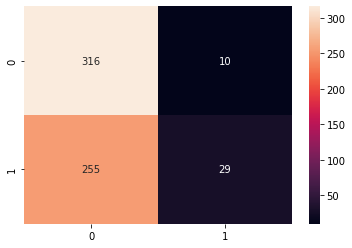

0.8 

Accuracy Score 0.5361
F1 Score 0.007 

Confusion Matrix


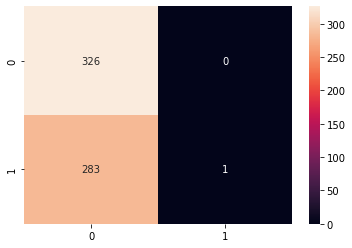

0.9 

Accuracy Score 0.5344
F1 Score 0.0 

Confusion Matrix


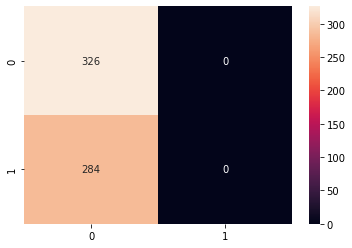

In [204]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j
    custom_cutoff_data=[]
    for i in range(0,len(y1_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y1_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y1_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y1_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [205]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

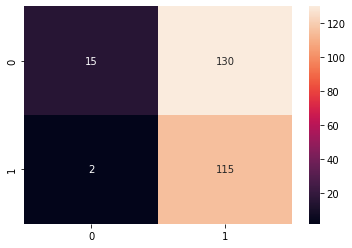

In [206]:
sns.heatmap((metrics.confusion_matrix(y1_test,data_pred_custom_cutoff)),annot=True,fmt='.5g');

In [207]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.88      0.10      0.19       145
           1       0.47      0.98      0.64       117

    accuracy                           0.50       262
   macro avg       0.68      0.54      0.41       262
weighted avg       0.70      0.50      0.39       262
 



In [208]:
lr_metrics=classification_report(y_train,y_train_predict,output_dict=True) #pred_prob_train,y_train_predict,pred_class_train
ds1=pd.DataFrame(lr_metrics).transpose()
lr_train_precision=round(ds1.loc["1"][0],2)
lr_train_recall=round(ds1.loc["1"][1],2)
lr_train_f1=round(ds1.loc["1"][2],2)
print('lr_train_precision ',lr_train_precision)
print('lr_train_recall ',lr_train_recall)
print('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.67
lr_train_recall  0.44
lr_train_f1  0.54


In [209]:
lr_metrics=classification_report(y_test,y_test_predict,output_dict=True) 
ds1=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(ds1.loc["1"][0],2)
lr_test_recall=round(ds1.loc["1"][1],2)
lr_test_f1=round(ds1.loc["1"][2],2)
print('lr_test_precision ',lr_test_precision)
print('lr_test_recall ',lr_test_recall)
print('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.62
lr_test_recall  0.44
lr_test_f1  0.52


In [210]:
lda_metrics=classification_report(y1_train,pred_class_train,output_dict=True) 
ds1=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(ds1.loc["1"][0],2)
lda_train_recall=round(ds1.loc["1"][1],2)
lda_train_f1=round(ds1.loc["1"][2],2)
print('lda_train_precision ',lda_train_precision)
print('lda_train_recall ',lda_train_recall)
print('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.68
lda_train_recall  0.43
lda_train_f1  0.53


In [211]:
lda_metrics=classification_report(y1_test,pred_class_test,output_dict=True) 
ds1=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(ds1.loc["1"][0],2)
lda_test_recall=round(ds1.loc["1"][1],2)
lda_test_f1=round(ds1.loc["1"][2],2)
print('lda_test_precision ',lda_test_precision)
print('lda_test_recall ',lda_test_recall)
print('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.62
lda_test_recall  0.44
lda_test_f1  0.52


In [212]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR_Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
'LR_Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
'LDA_Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
'LDA_Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,LR_Train,LR_Test,LDA_Train,LDA_Test
Accuracy,0.65,0.63,0.65,0.63
AUC,0.67,0.66,0.64,0.69
Recall,0.44,0.44,0.43,0.44
Precision,0.67,0.62,0.68,0.62
F1 Score,0.54,0.52,0.53,0.52
